<a href="https://colab.research.google.com/github/abhishek01bv/Support-Vector-Machine/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/Diamond Price prediction.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [4]:
df.describe(include='O')

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [6]:
df.shape

(53940, 11)

In [7]:
df.isnull().sum()

,0
Unnamed: 0,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0


In [8]:
df.loc[df['x'].isnull(),'x']= np.mean(df['x'])

In [9]:
df.loc[df['y'].isnull(),'y']= np.mean(df['y'])

In [10]:
df.loc[df['z'].isnull(),'z']= np.mean(df['z'])

In [11]:
df.loc[df['table'].isnull(),'table']= np.mean(df['table'])

In [12]:
df.loc[df['depth'].isnull(),'depth']= np.mean(df['depth'])

In [13]:
df.loc[df['price'].isnull(),'price']= np.mean(df['price'])

In [14]:
df.isnull().sum()

,0
Unnamed: 0,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0


<Axes: >

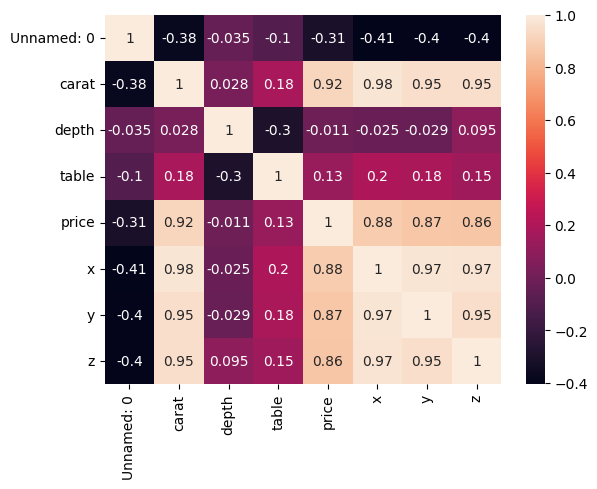

In [15]:
sns.heatmap(df.drop(['cut','color','clarity'],axis=1).corr(), annot=True)

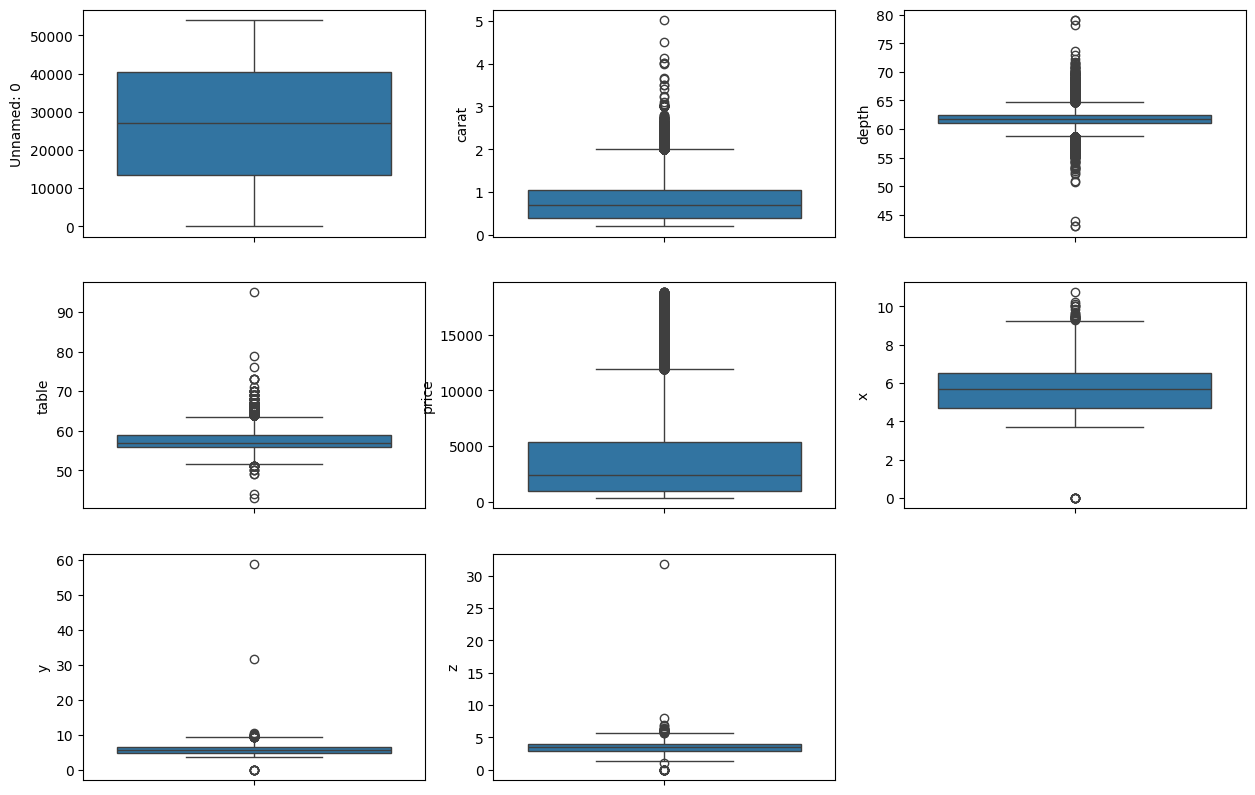

In [16]:
plt.figure(figsize=(15,10))
plotnumber =1

for column in df.drop(['cut','color','clarity'],axis=1):
  plt.subplot(3,3,plotnumber)
  sns.boxplot(df[column])
  plotnumber+=1
plt.show()

In [17]:
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757.0,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757.0,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757.0,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757.0,6.15,6.12,3.74


<Axes: xlabel='cut', ylabel='price'>

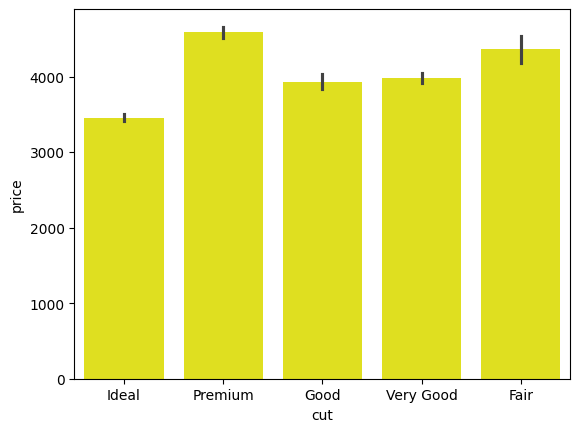

In [62]:
sns.barplot(data=df, x="cut", y="price" , color="yellow")

<Axes: xlabel='price', ylabel='Count'>

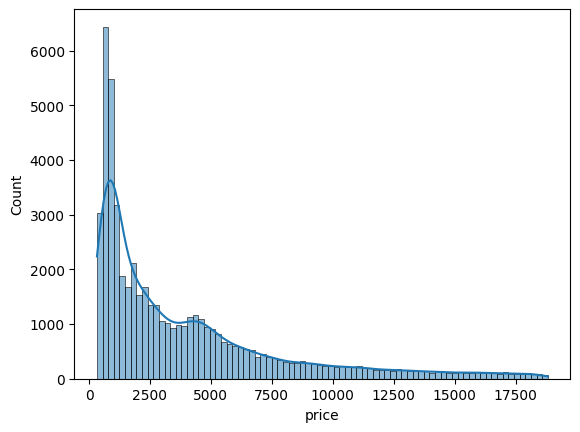

In [64]:
sns.histplot(x=df['price'],kde=True)

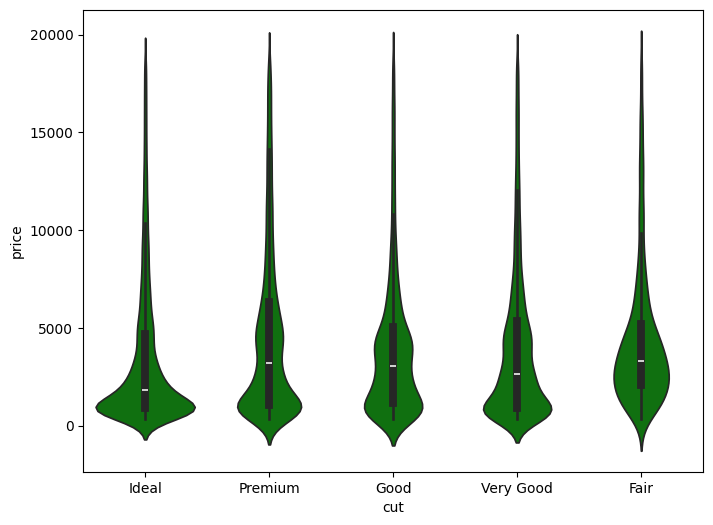

In [65]:
plt.figure(figsize=(8,6))
sns.violinplot(data=df, x="cut",y="price",color="green")
plt.show()

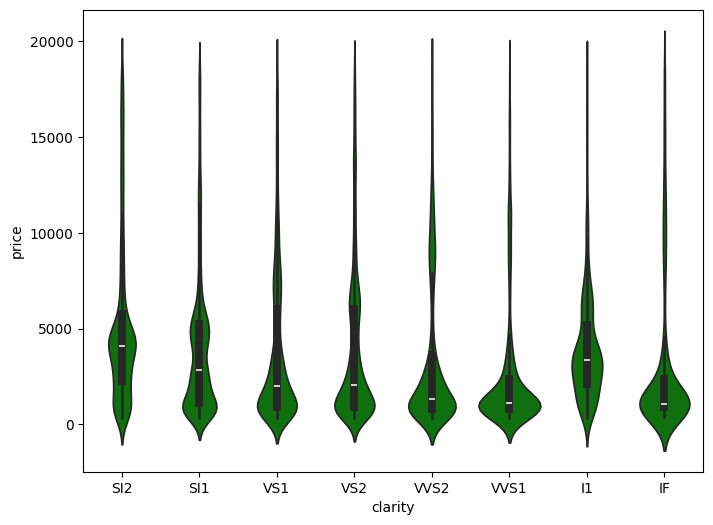

In [66]:
plt.figure(figsize=(8,6))
sns.violinplot(data=df, x="clarity",y="price",color="green")
plt.show()

In [18]:
df['cut'].value_counts()

,count
cut,
Ideal,21551
Premium,13791
Very Good,12082
Good,4906
Fair,1610


In [19]:
df['color'].value_counts()

,count
color,
G,11292
E,9797
F,9542
H,8304
D,6775
I,5422
J,2808


In [20]:
df['clarity'].value_counts()
df.drop('Unnamed: 0',axis=1, inplace = True)

In [21]:
df1 = df.drop(['cut','color','clarity'], axis=1)

In [22]:
def calculate_outliers(df):
  outlier_percentage = {}
  for column in df1.columns:
    Q1 = df1[column].quantile(0.25)
    Q3 = df1[column].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1-1.5*IQR
    upper_bound = Q3+1.5*IQR
    outliers = df[(df[column]<lower_bound)|(df[column]>upper_bound)]
    outlier_percentage[column] = len(outliers)/len(df1) *100
  return pd.Series(outlier_percentage)

outliers_in_data = calculate_outliers(df1)
print(outliers_in_data)

carat    3.502039
depth    4.718205
table    1.121617
price    6.562848
x        0.059325
y        0.053763
z        0.090842
dtype: float64


In [48]:
removing_outliers = df1.copy()
for columns in df1.columns:
  q1 = df1[columns].quantile(0.25)
  q3 = df1[columns].quantile(0.75)
  iqr = q3-q1
  lower = q1 - 1.5*iqr
  upper = q3 + 1.5*iqr
  print(lower,upper)
  outlier = (df1[columns] < lower) | (df1[columns] > upper)
  lower = 0
  upper = 0
  removing_outliers.loc[outlier, columns] = np.median(df1[columns])
print(removing_outliers)


-0.158004158004158 0.37422037422037424
0.4375000000000002 0.6041666666666663
0.16346153846153888 0.39423076923076883
-0.3209912418229983 0.624945937179002
0.18296089385474867 0.8645251396648044
0.03378607809847198 0.15738539898132428
0.03820754716981134 0.18034591194968552
          carat     depth     table     price         x         y         z
0      0.006237  0.513889  0.230769  0.000000  0.367784  0.067572  0.076415
1      0.002079  0.466667  0.346154  0.000000  0.362197  0.065195  0.072642
2      0.006237  0.522222  0.269231  0.000054  0.377095  0.069100  0.072642
3      0.018711  0.538889  0.288462  0.000433  0.391061  0.071817  0.082704
4      0.022869  0.563889  0.288462  0.000487  0.404097  0.073854  0.086478
...         ...       ...       ...       ...       ...       ...       ...
53935  0.108108  0.494444  0.269231  0.131427  0.535382  0.097793  0.110063
53936  0.108108  0.558333  0.230769  0.131427  0.529795  0.097623  0.113522
53937  0.103950  0.550000  0.326923  0.131

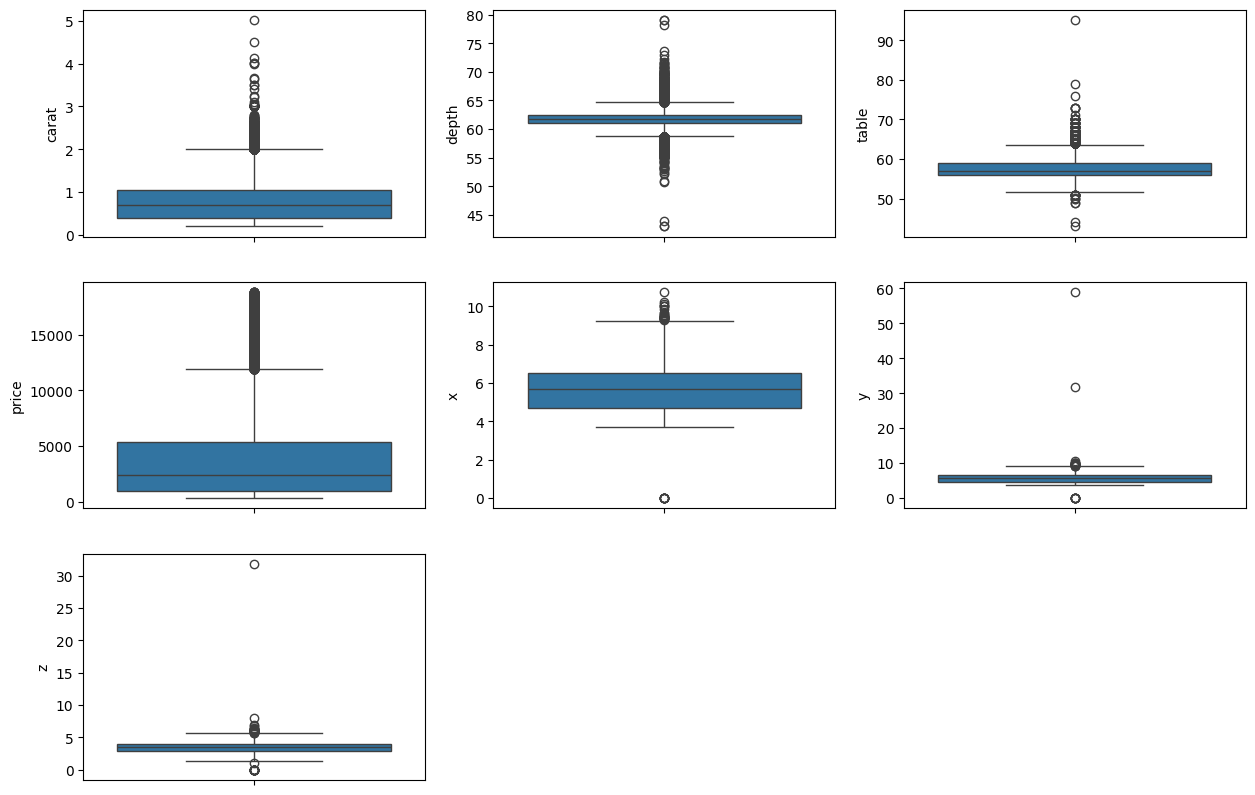

In [49]:
plt.figure(figsize=(15,10))
plotnumber =1

for column in df1.columns:
  plt.subplot(3,3,plotnumber)
  sns.boxplot(df[column])
  plotnumber+=1
plt.show()

<Axes: >

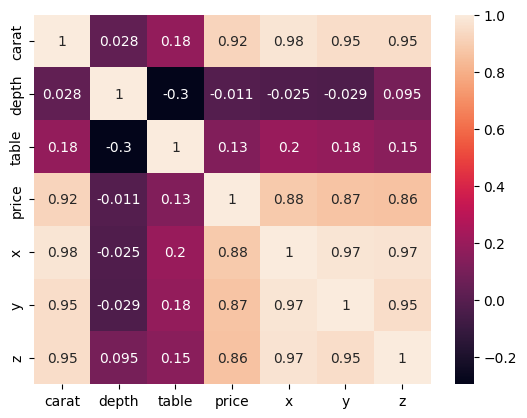

In [24]:
sns.heatmap(df1.corr(),annot=True)

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1 = pd.DataFrame(scaler.fit_transform(df1), columns=df1.columns)


In [51]:
df1

,carat,depth,table,price,x,y,z
0,-1.198168,-0.174092,-1.099672,-0.904095,-1.587837,-1.536196,-1.571129
1,-1.240361,-1.360738,1.585529,-0.904095,-1.641325,-1.658774,-1.741175
2,-1.198168,-3.385019,3.375663,-0.903844,-1.498691,-1.457395,-1.741175
3,-1.071587,0.454133,0.242928,-0.902090,-1.364971,-1.317305,-1.287720
4,-1.029394,1.082358,0.242928,-0.901839,-1.240167,-1.212238,-1.117674
...,...,...,...,...,...,...,...
53935,-0.164427,-0.662711,-0.204605,-0.294731,0.016798,0.022304,-0.054888
53936,-0.164427,0.942753,-1.099672,-0.294731,-0.036690,0.013548,0.100988
53937,-0.206621,0.733344,1.137995,-0.294731,-0.063434,-0.047741,0.030135
53938,0.130927,-0.523105,0.242928,-0.294731,0.373383,0.337506,0.285204


In [52]:
df2 = df.iloc[:,1:4]
df2

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2
...,...,...,...
53935,Ideal,D,SI1
53936,Good,D,SI1
53937,Very Good,D,SI1
53938,Premium,H,SI2


In [39]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df['cut'])
y = pd.DataFrame(y, columns = ['cut'])
y

,cut
0,2
1,3
2,1
3,3
4,1
...,...
53935,2
53936,1
53937,4
53938,3


In [29]:
color = df2[['color']]
color = pd.get_dummies(color,drop_first=True, dtype=int)
color.head()

,color_E,color_F,color_G,color_H,color_I,color_J
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [30]:
clarity = df2[['clarity']]
clarity = pd.get_dummies(clarity,drop_first=True,dtype =int)
clarity.head()

,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0


In [53]:
final_df = pd.concat([color,clarity,df1],axis=1)
final_df.head()
X = final_df.iloc[:,:]


In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [55]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)

SVC()

In [56]:
y_pred = svc.predict(X_test)

In [57]:
from sklearn.metrics import classification_report

In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.80      0.85       335
           1       0.69      0.59      0.64      1004
           2       0.81      0.92      0.86      4292
           3       0.73      0.80      0.76      2775
           4       0.59      0.43      0.49      2382

    accuracy                           0.74     10788
   macro avg       0.75      0.71      0.72     10788
weighted avg       0.73      0.74      0.73     10788

